<a href="https://colab.research.google.com/github/RosalesLuis123/IA/blob/main/Lab6/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **APRENDISAJE NO SUPERVISADO K-Means**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import sys
import sklearn
import matplotlib
import numpy as np

print('Python: {}'.format(sys.version))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('NumPy: {}'.format(np.__version__))

Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
Sklearn: 1.2.2
Matplotlib: 3.7.1
NumPy: 1.25.2


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

file_path = '/content/drive/My Drive/Laboratorio6/Glyphs_TMNIST_updated.csv'
data = pd.read_csv(file_path)

# Tomar una cuarta parte de los datos
data_sample = data.sample(frac=0.25, random_state=42)

# Eliminar la primera y segunda columna
data_sample = data_sample.iloc[:, 2:]

X = data_sample.drop(columns=['label']).values
y = data_sample['label'].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Training Data: {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))
print('Testing Data: {}'.format(x_test.shape))
print('Testing Labels: {}'.format(y_test.shape))


Training Data: (113058, 784)
Training Labels: (113058,)
Testing Data: (28265, 784)
Testing Labels: (28265,)


In [ ]:
import matplotlib.pyplot as plt

# python magic function
%matplotlib inline

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2401 (\N{DEVANAGARI LETTER VOCALIC LL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54168 (\N{HANGUL SYLLABLE PE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38957 (\N{CJK UNIFIED IDEOGRAPH-982D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10

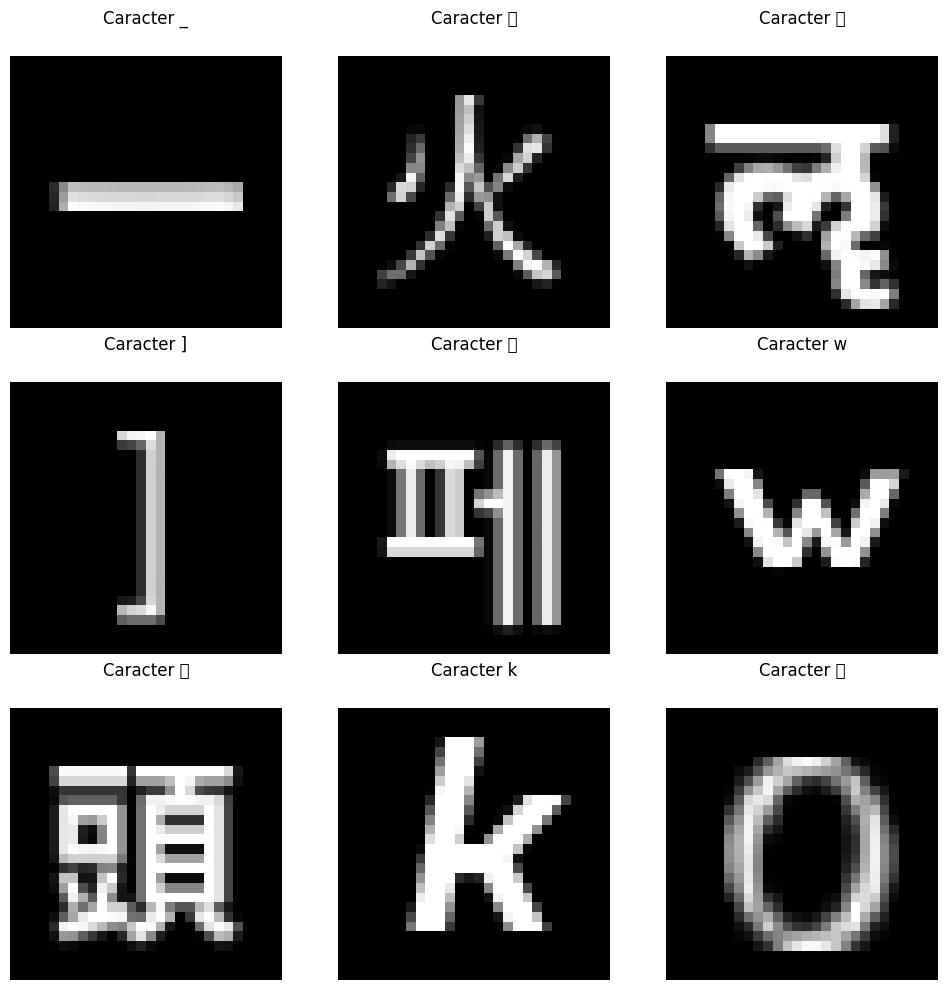

In [ ]:
# Definir el número de muestras a visualizar
num_samples = 20

# Elegir aleatoriamente num_samples muestras del conjunto de datos
random_indices = np.random.choice(range(len(x_train)), num_samples, replace=False)
sample_images = x_train[random_indices]
sample_labels = y_train[random_indices]

# Crear una figura con subtramas 3x3 utilizando matplotlib.pyplot
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
plt.gray()

# Iterar a través de las subtramas y agregar imágenes MNIST
for i, ax in enumerate(axs.flat):
    ax.matshow(sample_images[i].reshape(28, 28))  # Reshape a 28x28 para visualización
    ax.axis('off')
    ax.set_title('Caracter {}'.format(sample_labels[i]))

# Mostrar la figura
plt.show()


In [ ]:
# preprocessing the images

# convert each image to 1 dimensional array
X = x_train.reshape(len(x_train),-1)
Y = y_train

# normalize the data to 0 - 1
X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)

(113058, 784)
(784,)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter

def plot_silhouette_diagrams(X, range_k):
    fig, axs = plt.subplots(2, 2, figsize=(11, 9))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for i, k in enumerate(range_k):
        ax = axs[i // 2, i % 2]
        kmeans = KMeans(n_clusters=k, random_state=42)
        y_pred = kmeans.fit_predict(X)
        silhouette_coefficients = silhouette_samples(X, y_pred)

        silhouette_avg = silhouette_score(X, y_pred)
        ticks = []
        y_lower = 10

        for j in range(k):
            jth_cluster_silhouette_values = silhouette_coefficients[y_pred == j]
            jth_cluster_silhouette_values.sort()

            size_cluster_j = jth_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_j

            color = mpl.cm.Spectral(j / k)
            ax.fill_betweenx(np.arange(y_lower, y_upper), 0, jth_cluster_silhouette_values,
                             facecolor=color, edgecolor=color, alpha=0.7)
            ticks.append((y_lower + y_upper) / 2)
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax.set_yticks(ticks)
        ax.set_yticklabels(range(k))
        ax.set_ylabel('Cluster')
        ax.set_xlabel('Silhouette Coefficient')
        ax.set_title(f'Silhouette Analysis for k = {k}', fontsize=16)

    plt.show()

# Llama a la función con el rango de k que deseas analizar
plot_silhouette_diagrams(X, range(2, 5))

In [ ]:
from sklearn.cluster import MiniBatchKMeans

n_digits = len(np.unique(y_test))
print(n_digits)

# Initialize KMeans model
kmeans = MiniBatchKMeans(n_clusters = n_digits)

# Fit the model to the training data
kmeans.fit(X)

1541


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(n_clusters=1541)

In [ ]:
kmeans.labels_

array([ 193, 1141, 1499, ..., 1314, 1113,  896], dtype=int32)

In [ ]:
def infer_cluster_labels(kmeans, actual_labels):
    """
    Asocia las etiquetas con cada clúster en el modelo KMeans
    returns: diccionario de clústeres asignados a listas de etiquetas
    """

    inferred_labels = {}

    for i in range(kmeans.n_clusters):
        # Encuentra los índices de los puntos en el clúster
        indices = np.where(kmeans.labels_ == i)[0]

        # Obtiene las etiquetas correspondientes a esos índices
        cluster_labels = actual_labels[indices]

        # Asigna el clúster a una lista de etiquetas
        if i in inferred_labels:
            inferred_labels[i].extend(cluster_labels)
        else:
            inferred_labels[i] = list(cluster_labels)

    return inferred_labels



def infer_data_labels(X_labels, cluster_labels):
    """
    Determina la etiqueta para cada array, dependiendo del clúster al que ha sido asignado.
    returns: etiquetas predichas para cada array
    """

    predicted_labels = []

    for cluster in X_labels:
        # Busca la etiqueta asociada al clúster
        for label, clusters in cluster_labels.items():
            if cluster in clusters:
                predicted_labels.append(label)
                break

    return predicted_labels


In [ ]:
# test the infer_cluster_labels() and infer_data_labels() functions
cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print (predicted_labels[:20])
print (Y[:20])

In [ ]:
from sklearn import metrics

def calculate_metrics(estimator, data, labels):

    # Calculate and print metrics
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))

In [ ]:
clusters = [10, 16, 36, 64, 144, 256]

# test different numbers of clusters
for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(X)

    # print cluster metrics
    calculate_metrics(estimator, X, Y)

    # determine predicted labels
    cluster_labels = infer_cluster_labels(estimator, Y)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)

    # calculate and print accuracy
    print('Accuracy: {}\n'.format(metrics.accuracy_score(Y, predicted_Y)))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 10
Inertia: 4061008.064329383
Homogeneity: 0.17190761335030372
Accuracy: 0.0



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 16
Inertia: 3860883.396530447
Homogeneity: 0.20717540448090613
Accuracy: 0.0



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 36
Inertia: 3462620.394040729
Homogeneity: 0.30207778741055413
Accuracy: 0.0



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 64
Inertia: 3198985.0591385914
Homogeneity: 0.3706477486306089
Accuracy: 0.0



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 144
Inertia: 2839518.384854837
Homogeneity: 0.47151732949474473
Accuracy: 0.0



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 256
Inertia: 2589155.5604815288
Homogeneity: 0.5332061408457583
Accuracy: 0.0



In [ ]:
# test kmeans algorithm on testing dataset
# convert each image to 1 dimensional array
X_test = x_test.reshape(len(x_test),-1)

# normalize the data to 0 - 1
X_test = X_test.astype(float) / 255.

# initialize and fit KMeans algorithm on training data
kmeans = MiniBatchKMeans(n_clusters = 256)
kmeans.fit(X)
cluster_labels = infer_cluster_labels(kmeans, Y)

# predict labels for testing data
test_clusters = kmeans.predict(X_test)
predicted_labels = infer_data_labels(kmeans.predict(X_test), cluster_labels)

# calculate and print accuracy
print('Accuracy: {}\n'.format(metrics.accuracy_score(y_test, predicted_labels)))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy: 0.0



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


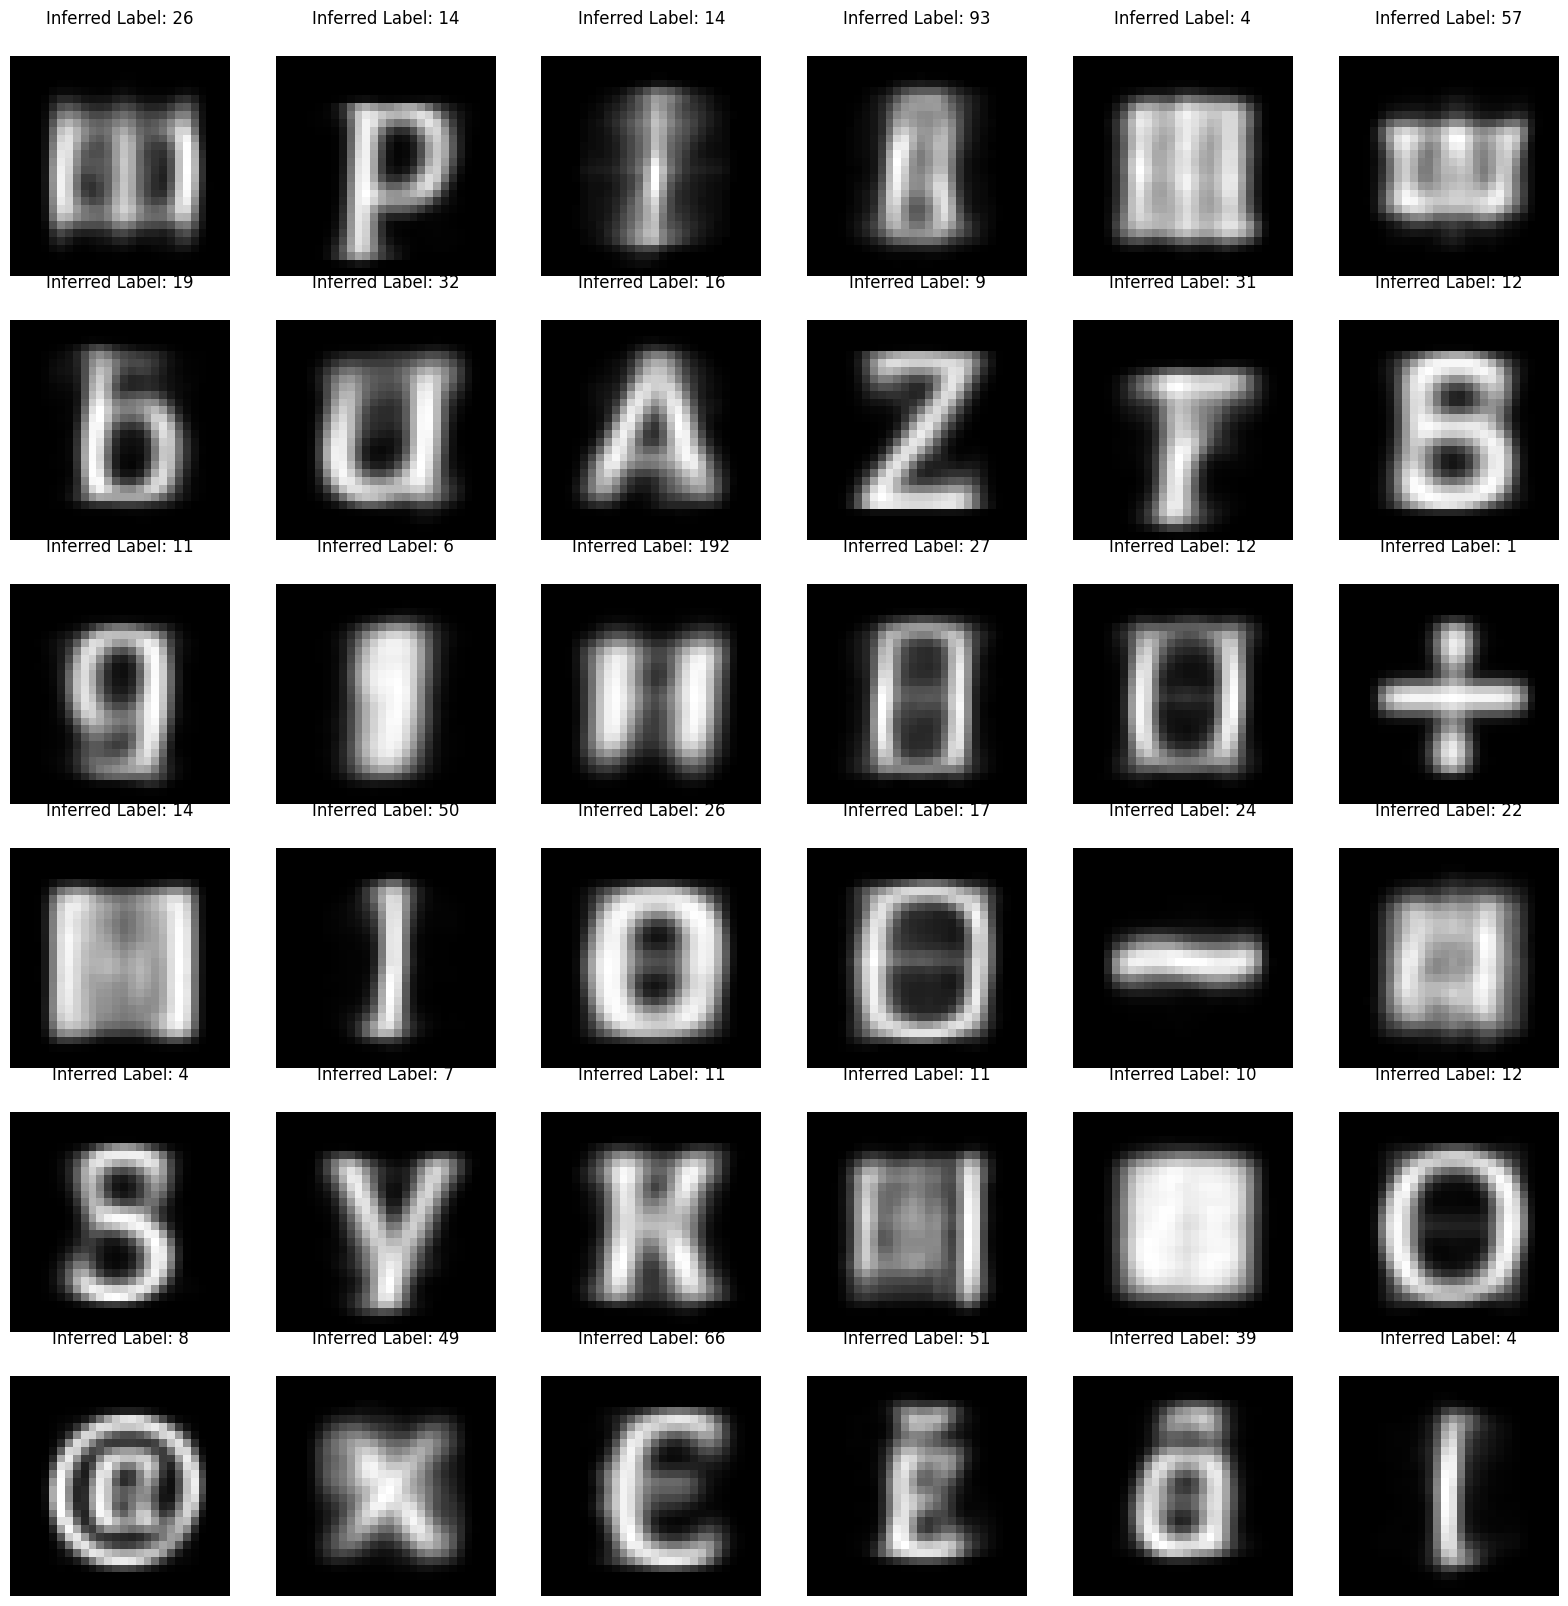

In [ ]:
# Initialize and fit KMeans algorithm
kmeans = MiniBatchKMeans(n_clusters = 36)
kmeans.fit(X)

# record centroid values
centroids = kmeans.cluster_centers_

# reshape centroids into images
images = centroids.reshape(36, 28, 28)
images *= 255
images = images.astype(np.uint8)

# determine cluster labels
cluster_labels = infer_cluster_labels(kmeans, Y)

# create figure with subplots using matplotlib.pyplot
fig, axs = plt.subplots(6, 6, figsize = (20, 20))
plt.gray()

# loop through subplots and add centroid images
for i, ax in enumerate(axs.flat):

    # determine inferred label using cluster_labels dictionary
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('Inferred Label: {}'.format(key))

    # add image to subplot
    ax.matshow(images[i])
    ax.axis('off')

# display the figure
fig.show()